# 1. Data understanding, preparation and EDA

In [1218]:
# Importing all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [1219]:
#Importing dataset
bike = pd.read_csv(r"C:\Users\ankit\Desktop\upGrad\Course 4\Module 2 - LR Assignment\day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1.1 Data Cleaning

In [1220]:
#Checking dataset for any null values and data types of each feature
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1221]:
#Changing data type of 'dteday' column from object to Pandas date-time format
bike['dteday'] = pd.to_datetime(bike['dteday'], dayfirst=True)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1222]:
# Re-confirming datattype of each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [1223]:
bike.shape

(730, 16)

In [1224]:
#Checking for any abnormality in data
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1225]:
#Dropping unnecessary columns from the dataset
bike.drop(['instant','casual','registered'], axis=1, inplace=True)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


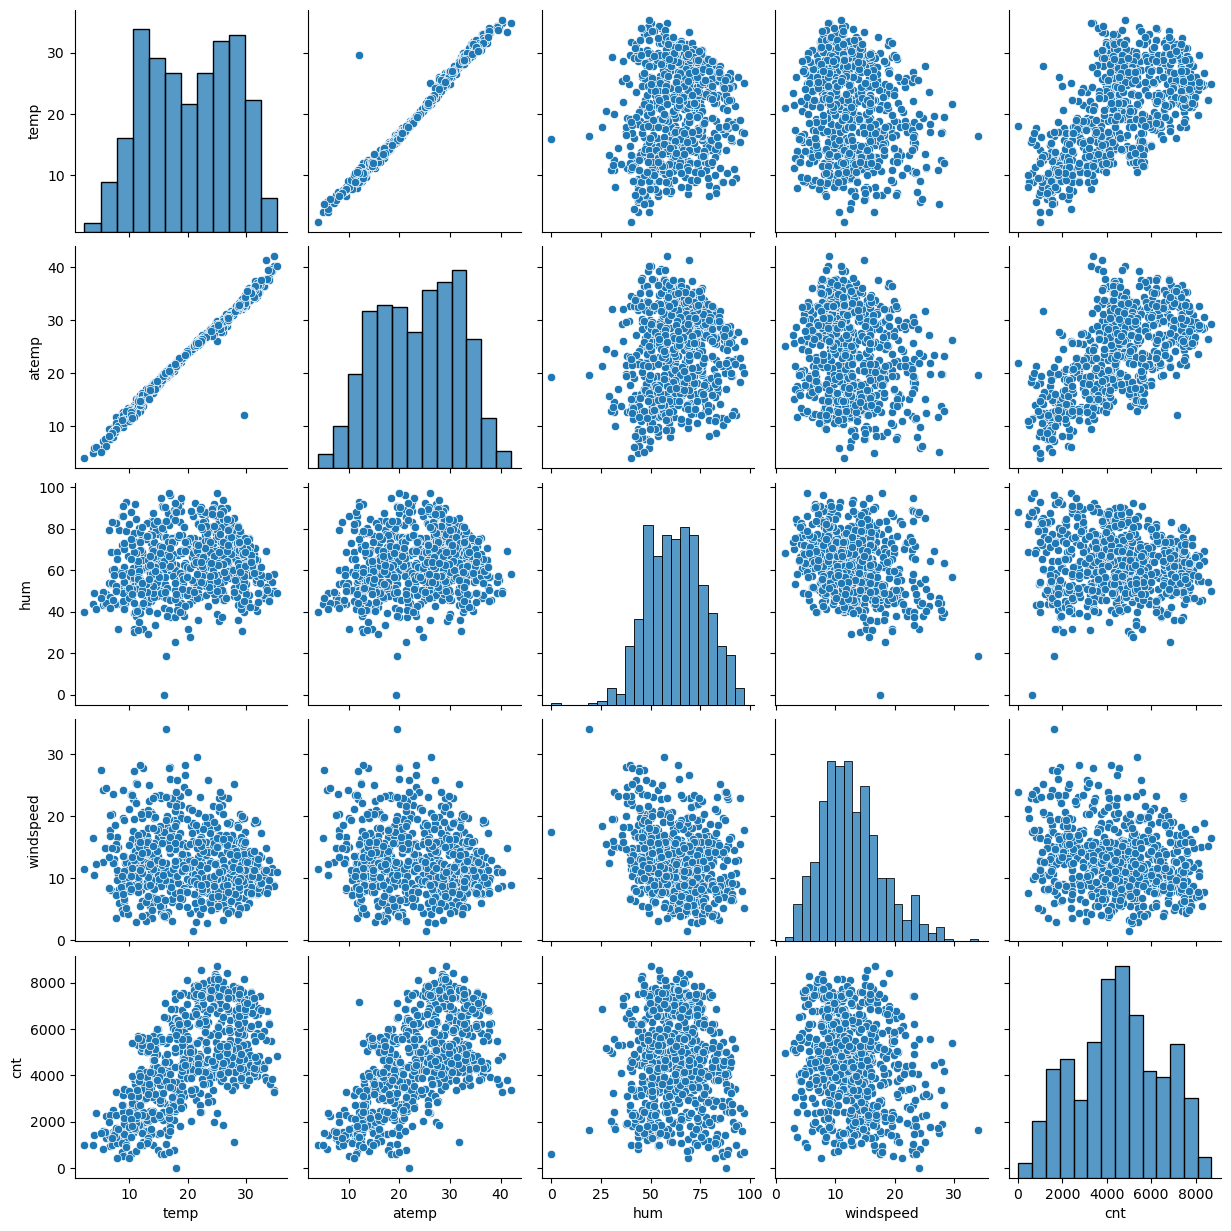

In [1226]:
# Checking pairplots of numerical variables
datavar = ['temp','atemp','hum','windspeed', 'cnt']
sns.pairplot(bike[datavar])

<Axes: >

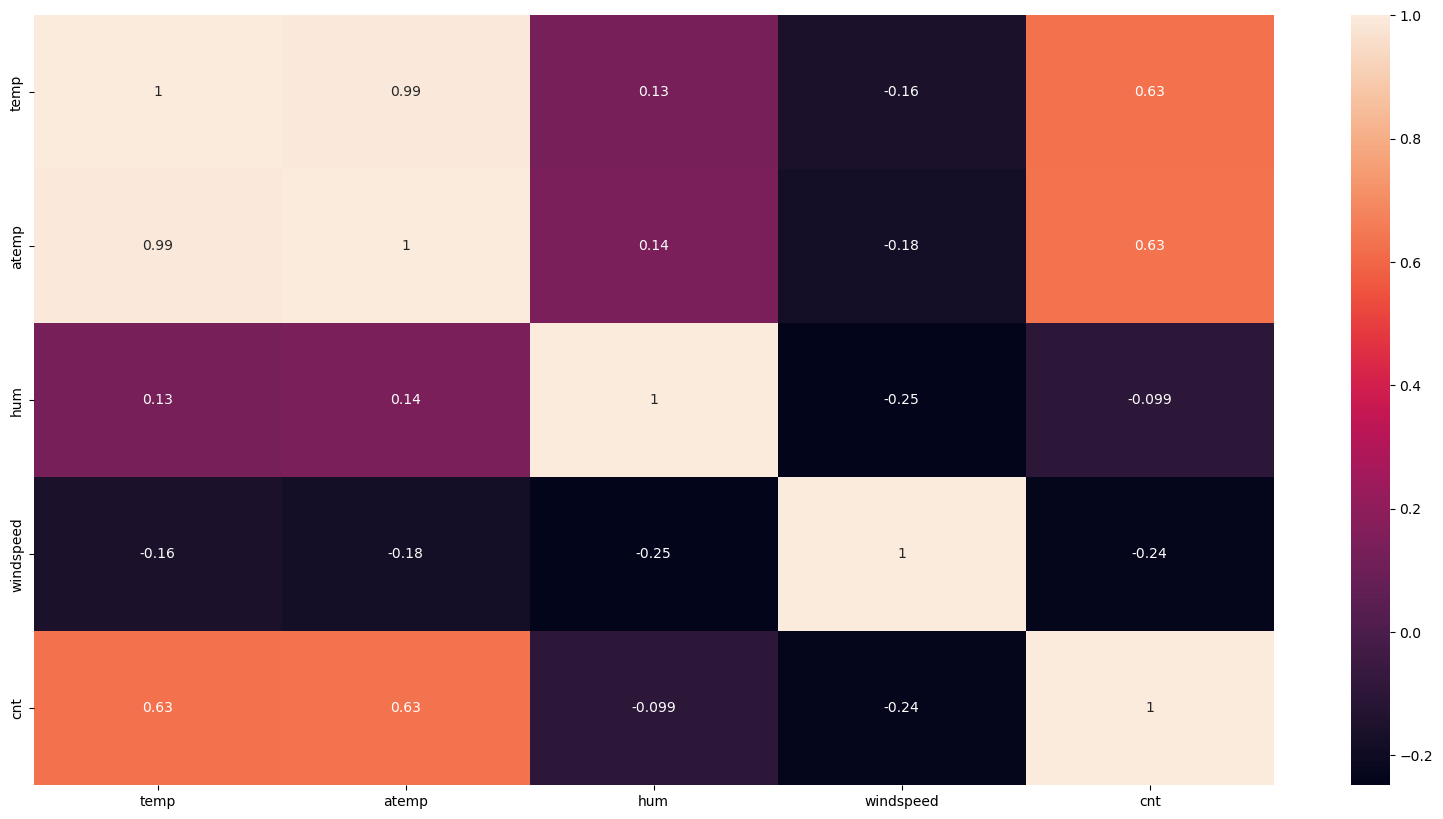

In [1277]:
# Checking correlation between different features of the dataset
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(bike[datavar].corr(),annot = True)

### 1.2 Mapping categorical variable

In [1227]:
#Mapping values of 'season' column to their actual values
def seasonmap(x):
    if x == 1:return 'spring'
    elif x == 2:return 'summer'
    elif x == 3:return 'fall'
    else:return 'winter'
bike['season'] = bike['season'].apply(lambda x: seasonmap(x))
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1228]:
#Mapping values of 'mnth' column to their actual values
def monthmap(x):
    if x == 1: return 'Jan'
    elif x == 2: return 'Feb'
    elif x == 3: return 'Mar'
    elif x == 4: return 'Apr'
    elif x == 5: return 'May'
    elif x == 6: return 'Jun'
    elif x == 7: return 'Jul'
    elif x == 8: return 'Aug'
    elif x == 9: return 'Sep'
    elif x == 10: return 'Oct'
    elif x == 11: return 'Nov'
    else: return 'Dec'
bike['mnth'] = bike['mnth'].apply(lambda x: monthmap(x))
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1229]:
#Mapping values of 'weekday' column to their actual values
def daymap(x):
    if x == 0: return 'Sun'
    elif x == 1: return 'Mon'
    elif x == 2: return 'Tue'
    elif x == 3: return 'Wed'
    elif x == 4: return 'Thu'
    elif x == 5: return 'Fri'
    else: return 'Sat'
bike['weekday'] = bike['weekday'].apply(lambda x: daymap(x))
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1230]:
#Mapping values of 'weathersit' column to their actual values
def weathermap(x):
    if x == 1: return 'Clear'
    elif x == 2: return 'Cloudy'
    elif x == 3: return 'LRain'
    else: return 'HRain'
bike['weathersit'] = bike['weathersit'].apply(lambda x: weathermap(x))
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


<Axes: xlabel='weathersit', ylabel='cnt'>

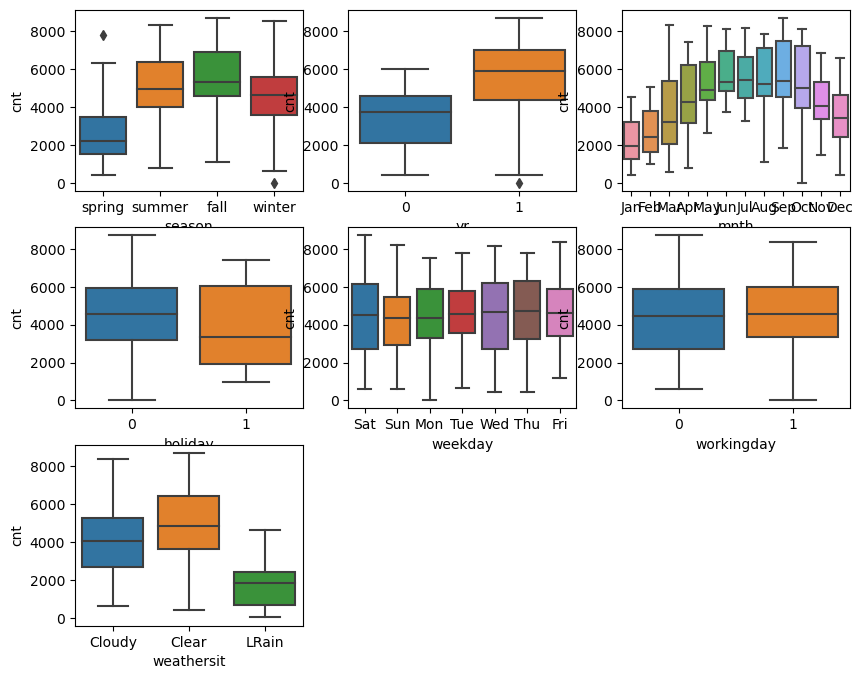

In [1231]:
# Plotting boxplot of all categorical data to understand the behaviour of each category
plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike)

plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt',data=bike)
            
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike)

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike)

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike)

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike)

### 1.3 Creating derived variable

In [1232]:
# Deriving "days since the data is available"
from datetime import datetime
d0 = datetime(2017,12,31)
delta = bike.dteday-d0
bike['day'] = delta
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,2018-01-01,spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1 days
1,2018-01-02,spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,2 days
2,2018-01-03,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3 days
3,2018-01-04,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4 days
4,2018-01-05,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5 days


In [1233]:
# Cleaning 'day' column
bike.day = bike.day.apply(lambda x: str(x).split()[0])
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,2018-01-01,spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1
1,2018-01-02,spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,2
2,2018-01-03,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,2018-01-04,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,2018-01-05,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5


<Axes: xlabel='day'>

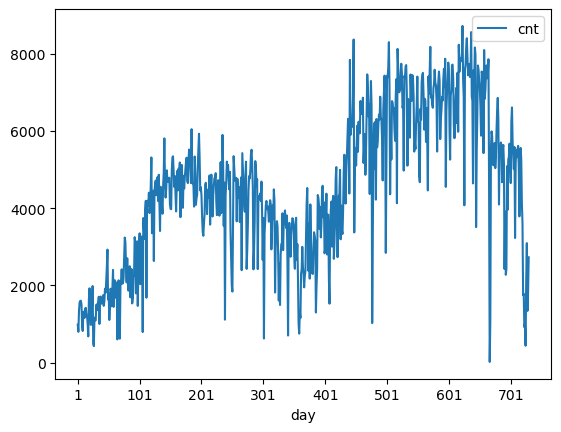

In [1234]:
#Days v/s 'cnt'
bike.plot.line(x='day', y='cnt')

In [1235]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,2018-01-01,spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1
1,2018-01-02,spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,2
2,2018-01-03,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,2018-01-04,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,2018-01-05,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5


In [1236]:
#Dropping unnecessary columns from the dataset
bike.drop(['dteday','day'], axis=1, inplace=True)

### 1.4 Creating dummy variables

In [1237]:
#Creating dummy variables for 'season' column
dummy = pd.get_dummies(bike['season'], drop_first=True)
bike = pd.concat([bike, dummy], axis=1)
bike.drop('season', axis=1, inplace=True)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [1238]:
#Creating dummy variables for 'mnth' column
dummy = pd.get_dummies(bike['mnth'], drop_first=True)
bike = pd.concat([bike, dummy], axis=1)
bike.drop('mnth', axis=1, inplace=True)
bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [1239]:
#Creating dummy variables for 'weekday' column
dummy = pd.get_dummies(bike['weekday'], drop_first=True)
bike = pd.concat([bike, dummy], axis=1)
bike.drop('weekday', axis=1, inplace=True)
bike.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [1240]:
#Creating dummy variables for 'weathersit' column
dummy = pd.get_dummies(bike['weathersit'], drop_first=True)
bike = pd.concat([bike, dummy], axis=1)
bike.drop('weathersit', axis=1, inplace=True)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LRain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


# 2. Model building and evaluation

In [1241]:
# Splitting the train and test dataset
bike_train, bike_test = train_test_split(bike, train_size=0.7, random_state=80)
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LRain
129,0,0,1,21.832500,26.13605,48.9167,7.749957,4803,0,1,...,0,0,0,0,0,0,1,0,0,0
672,1,0,0,13.359153,16.47690,53.2917,12.000236,5107,0,0,...,0,0,0,0,1,0,0,0,0,0
255,0,0,1,26.684153,30.17770,71.2500,9.500868,4763,0,0,...,0,1,0,0,0,0,1,0,0,0
523,1,0,1,26.615847,29.89310,46.7917,11.750661,7736,0,1,...,0,0,0,0,0,0,0,0,0,0
257,0,0,1,23.677500,27.68355,70.9167,18.166782,3659,0,0,...,0,1,0,0,0,1,0,0,1,0


In [1242]:
#Using 'MinMaxScaler' to fit and transform all numerical variable
num_vars = ['temp','atemp','hum','windspeed','cnt']
scaler = MinMaxScaler()
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LRain
129,0,0,1,0.579261,0.571226,0.502999,0.152073,0.550046,0,1,...,0,0,0,0,0,0,1,0,0,0
672,1,0,0,0.304674,0.310891,0.547987,0.289365,0.585021,0,0,...,0,0,0,0,1,0,0,0,0,0
255,0,0,1,0.736484,0.680157,0.732648,0.208631,0.545444,0,0,...,0,1,0,0,0,0,1,0,0,0
523,1,0,1,0.734271,0.672486,0.481149,0.281304,0.887483,0,1,...,0,0,0,0,0,0,0,0,0,0
257,0,0,1,0.639050,0.612934,0.729221,0.488556,0.418431,0,0,...,0,1,0,0,0,1,0,0,1,0


In [1243]:
# Putting response variable to y
y_train = bike_train.pop('cnt')

# Putting feature variable to X
X_train = bike_train

In [1244]:
#Checking shape of train dataset to verify split
X_train.shape

(510, 29)

In [1245]:
# Using recursive feature elimination technique to reduce the number of features from 29 to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [1246]:
#Checking the rankign of each feature after RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('Aug', False, 15),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 12),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', False, 4),
 ('Sun', False, 10),
 ('Thu', False, 9),
 ('Tue', False, 8),
 ('Wed', False, 13),
 ('Cloudy', True, 1),
 ('LRain', True, 1)]

In [1247]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Cloudy', 'LRain'],
      dtype='object')

In [1248]:
#Creating train dataset with columns selected from RFE
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,temp,atemp,hum,windspeed,spring,winter,Dec,Jan,Jul,Nov,Sep,Cloudy,LRain
129,0,0,0.579261,0.571226,0.502999,0.152073,0,0,0,0,0,0,0,0,0
672,1,0,0.304674,0.310891,0.547987,0.289365,0,1,0,0,0,1,0,0,0
255,0,0,0.736484,0.680157,0.732648,0.208631,0,0,0,0,0,0,1,0,0
523,1,0,0.734271,0.672486,0.481149,0.281304,0,0,0,0,0,0,0,0,0
257,0,0,0.639050,0.612934,0.729221,0.488556,0,0,0,0,0,0,1,1,0


In [1249]:
X_train_rfe.shape

(510, 15)

<Axes: >

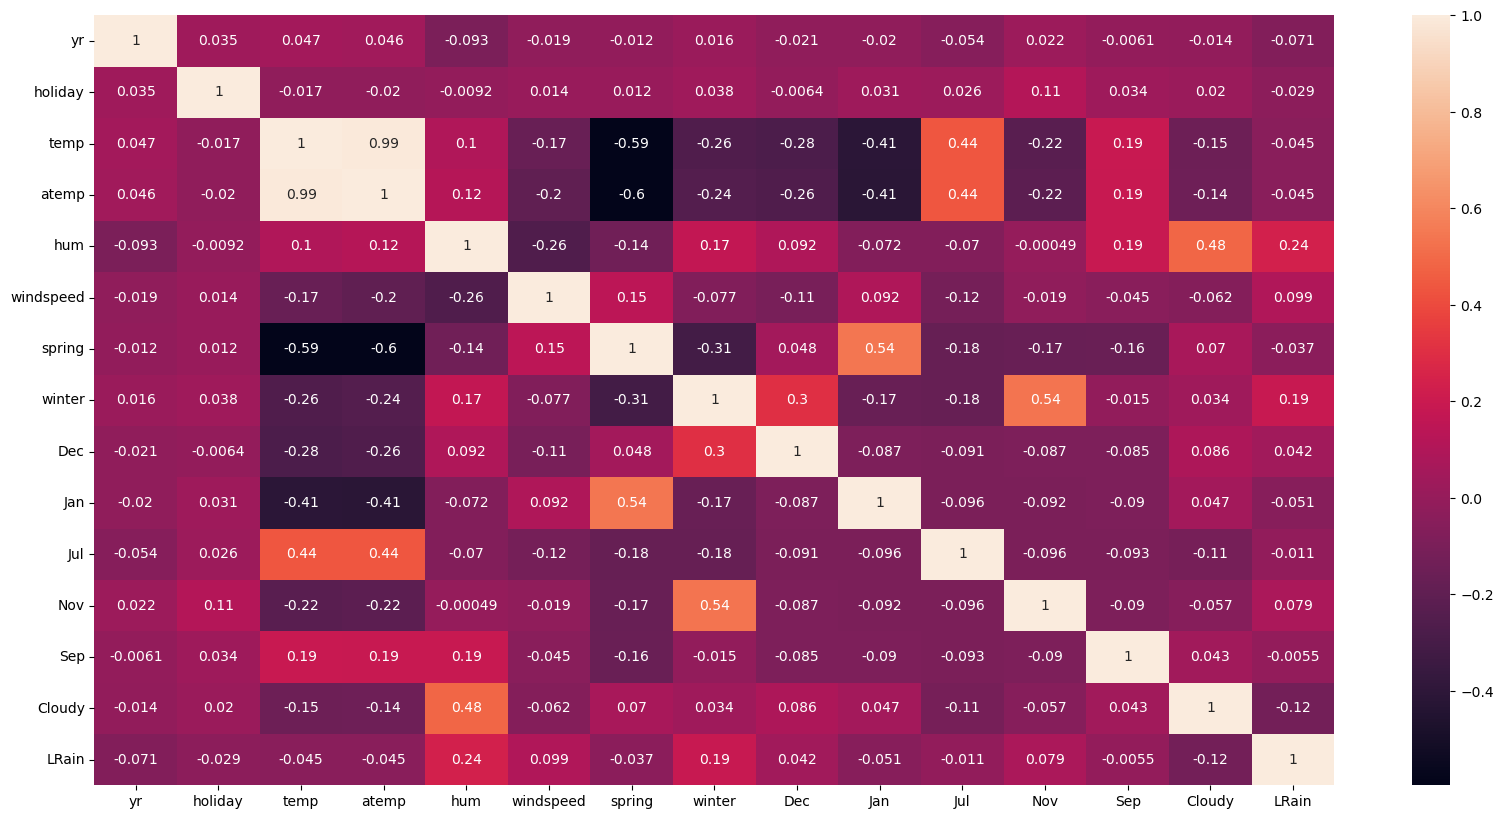

In [1250]:
# Checking correlation between different features of the dataset
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train_rfe.corr(),annot = True)

In [1251]:
#Adding constant in train set for statsmodel
X_train_rfe = sm.add_constant(X_train_rfe)

In [1252]:
#Creating linear model with all features
lm2 = sm.OLS(y_train, X_train_rfe)
lm2 = lm2.fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     160.3
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          1.04e-178
Time:                        13:45:45   Log-Likelihood:                 494.89
No. Observations:                 510   AIC:                            -957.8
Df Residuals:                     494   BIC:                            -890.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3812      0.032     11.841      0.000       0.318       0.444
yr             0.2340      0.008     27.859      0.000       0.218       0.251
holiday       -0.0751      0.025     -3.035      0.003      -0.124      -0.026
temp           0.2960      0.123      2.414      0.016       0.055       0.537
atemp          0.1291      0.134      0.964      0.335      -0.134       0.392
hum           -0.1685      0.038     -4.411      0.000      -0.244      -0.093
windspeed     -0.1578      0.028     -5.699      0.000      -0.212      -0.103
spring        -0.1052      0.016     -6.561      0.000      -0.137      -0.074
winter         0.0737      0.015      5.004      0.000       0.045       0.103
Dec           -0.0511      0.018     -2.766      0.006      -0.087      -0.015
Jan           -0.0439      0.018     -2.384      0.017      -0.080      -0.008
Jul           -0.0677      0.017     -4.021      0.000      -0.101      -0.035
Nov           -0.0548      0.020     -2.807      0.005      -0.093      -0.016
Sep            0.0544      0.016      3.375      0.001       0.023       0.086
Cloudy        -0.0491      0.011     -4.511      0.000      -0.070      -0.028
LRain         -0.2136      0.028     -7.552      0.000      -0.269      -0.158
==============================================================================
Omnibus:                       78.208   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.752
Skew:                          -0.767   Prob(JB):                     5.70e-45
Kurtosis:                       5.690   Cond. No.                         70.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1253]:
#Checking VIF of each feature
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,Features,VIF
0,const,60.90
3,temp,52.82
4,atemp,51.33
7,spring,2.73
8,winter,2.33
5,hum,1.88
12,Nov,1.73
14,Cloudy,1.57
10,Jan,1.54
9,Dec,1.42


In [1254]:
#Dropping 'atemp' with high VIF and high p-value
X_train_rfe.drop('atemp', axis=1, inplace=True)
X_train_rfe
lm3 = sm.OLS(y_train, X_train_rfe)
lm3 = lm3.fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.7
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          1.24e-179
Time:                        13:45:50   Log-Likelihood:                 494.41
No. Observations:                 510   AIC:                            -958.8
Df Residuals:                     495   BIC:                            -895.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3851      0.032     12.061      0.000       0.322       0.448
yr             0.2340      0.008     27.864      0.000       0.218       0.251
holiday       -0.0755      0.025     -3.054      0.002      -0.124      -0.027
temp           0.4104      0.031     13.187      0.000       0.349       0.472
hum           -0.1653      0.038     -4.344      0.000      -0.240      -0.091
windspeed     -0.1621      0.027     -5.927      0.000      -0.216      -0.108
spring        -0.1051      0.016     -6.554      0.000      -0.137      -0.074
winter         0.0743      0.015      5.056      0.000       0.045       0.103
Dec           -0.0511      0.018     -2.767      0.006      -0.087      -0.015
Jan           -0.0449      0.018     -2.441      0.015      -0.081      -0.009
Jul           -0.0673      0.017     -4.001      0.000      -0.100      -0.034
Nov           -0.0549      0.020     -2.811      0.005      -0.093      -0.017
Sep            0.0540      0.016      3.351      0.001       0.022       0.086
Cloudy        -0.0494      0.011     -4.549      0.000      -0.071      -0.028
LRain         -0.2145      0.028     -7.589      0.000      -0.270      -0.159
==============================================================================
Omnibus:                       77.115   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.480
Skew:                          -0.756   Prob(JB):                     1.77e-44
Kurtosis:                       5.682   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1255]:
#Checking VIF of each feature
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,Features,VIF
0,const,59.92
3,temp,3.40
6,spring,2.73
7,winter,2.33
4,hum,1.87
11,Nov,1.73
13,Cloudy,1.57
9,Jan,1.53
8,Dec,1.42
10,Jul,1.36


In [1256]:
#Dropping 'const' with high VIF
X_train_rfe.drop('const', inplace=True, axis=1)
X_train_rfe
lm4 = sm.OLS(y_train, X_train_rfe)
lm4 = lm4.fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              996.3
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        13:46:17   Log-Likelihood:                          428.71
No. Observations:                 510   AIC:                                     -829.4
Df Residuals:                     496   BIC:                                     -770.1
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr             0.2496      0.009     26.462      0.000       0.231       0.268
holiday       -0.0799      0.028     -2.844      0.005      -0.135      -0.025
temp           0.6019      0.030     19.786      0.000       0.542       0.662
hum            0.1285      0.033      3.868      0.000       0.063       0.194
windspeed      0.0133      0.026      0.507      0.612      -0.038       0.065
spring        -0.0212      0.016     -1.289      0.198      -0.053       0.011
winter         0.1127      0.016      6.911      0.000       0.081       0.145
Dec           -0.0133      0.021     -0.643      0.521      -0.054       0.027
Jan           -0.0222      0.021     -1.070      0.285      -0.063       0.019
Jul           -0.0737      0.019     -3.859      0.000      -0.111      -0.036
Nov           -0.0139      0.022     -0.638      0.524      -0.057       0.029
Sep            0.0356      0.018      1.953      0.051      -0.000       0.071
Cloudy        -0.0761      0.012     -6.295      0.000      -0.100      -0.052
LRain         -0.2995      0.031     -9.626      0.000      -0.361      -0.238
==============================================================================
Omnibus:                       69.316   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.811
Skew:                          -0.762   Prob(JB):                     9.75e-32
Kurtosis:                       5.097   Cond. No.                         12.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1257]:
#Checking VIF of each feature
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,Features,VIF
3,hum,21.94
2,temp,14.61
4,windspeed,4.00
6,winter,2.92
5,spring,2.91
12,Cloudy,2.30
0,yr,2.02
10,Nov,1.83
8,Jan,1.66
9,Jul,1.50


In [1258]:
#Dropping 'windspeed' with high p-value
X_train_rfe.drop('windspeed', inplace=True, axis=1)
X_train_rfe
lm5 = sm.OLS(y_train, X_train_rfe)
lm5 = lm5.fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1074.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        13:46:17   Log-Likelihood:                          428.57
No. Observations:                 510   AIC:                                     -831.1
Df Residuals:                     497   BIC:                                     -776.1
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr             0.2498      0.009     26.546      0.000       0.231       0.268
holiday       -0.0796      0.028     -2.836      0.005      -0.135      -0.024
temp           0.6058      0.029     20.600      0.000       0.548       0.664
hum            0.1303      0.033      3.945      0.000       0.065       0.195
spring        -0.0188      0.016     -1.194      0.233      -0.050       0.012
winter         0.1135      0.016      6.996      0.000       0.082       0.145
Dec           -0.0137      0.021     -0.663      0.507      -0.054       0.027
Jan           -0.0217      0.021     -1.047      0.296      -0.062       0.019
Jul           -0.0750      0.019     -3.959      0.000      -0.112      -0.038
Nov           -0.0134      0.022     -0.614      0.540      -0.056       0.029
Sep            0.0352      0.018      1.933      0.054      -0.001       0.071
Cloudy        -0.0763      0.012     -6.312      0.000      -0.100      -0.053
LRain         -0.2982      0.031     -9.624      0.000      -0.359      -0.237
==============================================================================
Omnibus:                       68.391   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.445
Skew:                          -0.759   Prob(JB):                     8.65e-31
Kurtosis:                       5.052   Cond. No.                         11.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1259]:
#Checking VIF of each feature
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,Features,VIF
3,hum,21.70
2,temp,13.68
5,winter,2.89
4,spring,2.67
11,Cloudy,2.30
0,yr,2.01
9,Nov,1.83
7,Jan,1.65
6,Dec,1.49
8,Jul,1.47


In [1260]:
#Dropping 'Nov' with high p-value
X_train_rfe.drop('Nov', inplace=True, axis=1)
X_train_rfe
lm6 = sm.OLS(y_train, X_train_rfe)
lm6 = lm6.fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1165.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        13:46:18   Log-Likelihood:                          428.38
No. Observations:                 510   AIC:                                     -832.8
Df Residuals:                     498   BIC:                                     -781.9
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr             0.2495      0.009     26.566      0.000       0.231       0.268
holiday       -0.0817      0.028     -2.936      0.003      -0.136      -0.027
temp           0.6089      0.029     21.037      0.000       0.552       0.666
hum            0.1268      0.033      3.900      0.000       0.063       0.191
spring        -0.0185      0.016     -1.181      0.238      -0.049       0.012
winter         0.1086      0.014      7.708      0.000       0.081       0.136
Dec           -0.0093      0.019     -0.479      0.632      -0.047       0.029
Jan           -0.0206      0.021     -0.999      0.318      -0.061       0.020
Jul           -0.0756      0.019     -3.999      0.000      -0.113      -0.038
Sep            0.0365      0.018      2.019      0.044       0.001       0.072
Cloudy        -0.0753      0.012     -6.290      0.000      -0.099      -0.052
LRain         -0.2967      0.031     -9.611      0.000      -0.357      -0.236
==============================================================================
Omnibus:                       66.522   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.030
Skew:                          -0.747   Prob(JB):                     2.14e-29
Kurtosis:                       4.995   Cond. No.                         11.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1261]:
#Checking VIF of each feature
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,Features,VIF
3,hum,21.07
2,temp,13.27
4,spring,2.67
10,Cloudy,2.26
5,winter,2.18
0,yr,2.00
7,Jan,1.64
8,Jul,1.47
6,Dec,1.30
9,Sep,1.20


In [1262]:
#Dropping 'Dec' with high p-value
X_train_rfe.drop('Dec', inplace=True, axis=1)
X_train_rfe
lm7 = sm.OLS(y_train, X_train_rfe)
lm7 = lm7.fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1273.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        13:46:18   Log-Likelihood:                          428.26
No. Observations:                 510   AIC:                                     -834.5
Df Residuals:                     499   BIC:                                     -787.9
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr             0.2495      0.009     26.583      0.000       0.231       0.268
holiday       -0.0815      0.028     -2.931      0.004      -0.136      -0.027
temp           0.6114      0.028     21.492      0.000       0.556       0.667
hum            0.1241      0.032      3.878      0.000       0.061       0.187
spring        -0.0192      0.016     -1.228      0.220      -0.050       0.012
winter         0.1072      0.014      7.784      0.000       0.080       0.134
Jan           -0.0189      0.020     -0.931      0.352      -0.059       0.021
Jul           -0.0762      0.019     -4.042      0.000      -0.113      -0.039
Sep            0.0369      0.018      2.050      0.041       0.002       0.072
Cloudy        -0.0751      0.012     -6.285      0.000      -0.099      -0.052
LRain         -0.2958      0.031     -9.607      0.000      -0.356      -0.235
==============================================================================
Omnibus:                       65.943   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.669
Skew:                          -0.745   Prob(JB):                     6.96e-29
Kurtosis:                       4.970   Cond. No.                         11.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1263]:
#Checking VIF of each feature
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,Features,VIF
3,hum,20.45
2,temp,12.84
4,spring,2.65
9,Cloudy,2.25
5,winter,2.09
0,yr,2.00
6,Jan,1.59
7,Jul,1.46
8,Sep,1.19
10,LRain,1.19


In [1264]:
#Dropping 'Jan' with high p-value
X_train_rfe.drop('Jan', inplace=True, axis=1)
X_train_rfe
lm8 = sm.OLS(y_train, X_train_rfe)
lm8 = lm8.fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1401.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        13:46:18   Log-Likelihood:                          427.82
No. Observations:                 510   AIC:                                     -835.6
Df Residuals:                     500   BIC:                                     -793.3
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr             0.2493      0.009     26.575      0.000       0.231       0.268
holiday       -0.0823      0.028     -2.961      0.003      -0.137      -0.028
temp           0.6155      0.028     21.895      0.000       0.560       0.671
hum            0.1199      0.032      3.786      0.000       0.058       0.182
spring        -0.0247      0.014     -1.708      0.088      -0.053       0.004
winter         0.1081      0.014      7.866      0.000       0.081       0.135
Jul           -0.0772      0.019     -4.107      0.000      -0.114      -0.040
Sep            0.0368      0.018      2.043      0.042       0.001       0.072
Cloudy        -0.0745      0.012     -6.241      0.000      -0.098      -0.051
LRain         -0.2938      0.031     -9.567      0.000      -0.354      -0.233
==============================================================================
Omnibus:                       66.012   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.376
Skew:                          -0.747   Prob(JB):                     8.06e-29
Kurtosis:                       4.964   Cond. No.                         11.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1265]:
#Checking VIF of each feature
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,Features,VIF
3,hum,20.04
2,temp,12.54
4,spring,2.27
8,Cloudy,2.25
5,winter,2.08
0,yr,2.00
6,Jul,1.46
7,Sep,1.19
9,LRain,1.18
1,holiday,1.04


In [1266]:
#Dropping 'spring' with high p-value
X_train_rfe.drop('spring', inplace=True, axis=1)
X_train_rfe
lm9 = sm.OLS(y_train, X_train_rfe)
lm9 = lm9.fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1550.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        13:46:21   Log-Likelihood:                          426.34
No. Observations:                 510   AIC:                                     -834.7
Df Residuals:                     501   BIC:                                     -796.6
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr             0.2463      0.009     26.678      0.000       0.228       0.264
holiday       -0.0846      0.028     -3.039      0.002      -0.139      -0.030
temp           0.6431      0.023     27.937      0.000       0.598       0.688
hum            0.0842      0.024      3.534      0.000       0.037       0.131
winter         0.1202      0.012     10.205      0.000       0.097       0.143
Jul           -0.0791      0.019     -4.207      0.000      -0.116      -0.042
Sep            0.0410      0.018      2.294      0.022       0.006       0.076
Cloudy        -0.0701      0.012     -6.004      0.000      -0.093      -0.047
LRain         -0.2877      0.031     -9.415      0.000      -0.348      -0.228
==============================================================================
Omnibus:                       59.084   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.533
Skew:                          -0.700   Prob(JB):                     2.71e-24
Kurtosis:                       4.774   Cond. No.                         8.57
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1267]:
#Checking VIF of each feature
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,Features,VIF
3,hum,11.28
2,temp,8.38
7,Cloudy,2.14
0,yr,1.93
4,winter,1.52
5,Jul,1.45
6,Sep,1.17
8,LRain,1.17
1,holiday,1.04


In [1268]:
#Dropping 'hum' with high VIF
X_train_rfe.drop('hum', inplace=True, axis=1)
X_train_rfe
lm10 = sm.OLS(y_train, X_train_rfe)
lm10 = lm10.fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              1704.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        13:46:22   Log-Likelihood:                          420.06
No. Observations:                 510   AIC:                                     -824.1
Df Residuals:                     502   BIC:                                     -790.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr             0.2515      0.009     27.275      0.000       0.233       0.270
holiday       -0.0810      0.028     -2.880      0.004      -0.136      -0.026
temp           0.7093      0.014     52.354      0.000       0.683       0.736
winter         0.1359      0.011     12.321      0.000       0.114       0.158
Jul           -0.0928      0.019     -4.987      0.000      -0.129      -0.056
Sep            0.0403      0.018      2.231      0.026       0.005       0.076
Cloudy        -0.0458      0.010     -4.799      0.000      -0.065      -0.027
LRain         -0.2586      0.030     -8.689      0.000      -0.317      -0.200
==============================================================================
Omnibus:                       67.455   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.924
Skew:                          -0.798   Prob(JB):                     9.10e-27
Kurtosis:                       4.759   Cond. No.                         5.98
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1269]:
#Checking VIF of each feature
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,Features,VIF
2,temp,2.84
0,yr,1.89
6,Cloudy,1.40
4,Jul,1.39
3,winter,1.31
5,Sep,1.17
7,LRain,1.08
1,holiday,1.04


# 3. Residual Analysis

### Residuals are approximately normally distributed with mean equal to 0

<Axes: ylabel='Density'>

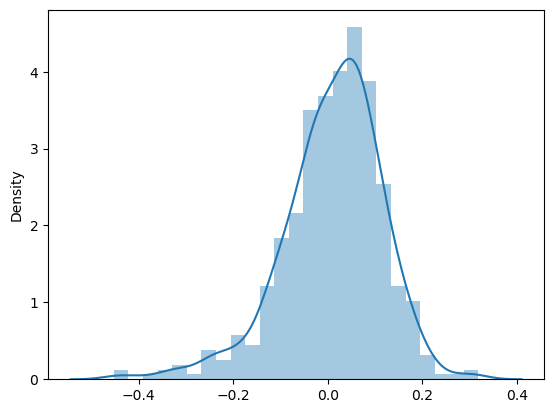

In [1270]:
#Plotting residual of train model on histogram
y_train_pred = lm11.predict(X_train_rfe)
res = y_train - y_train_pred
sns.distplot(res)

### Errors are independent over the dataset

Text(0, 0.5, 'Actual Demand-Predicted Demand')

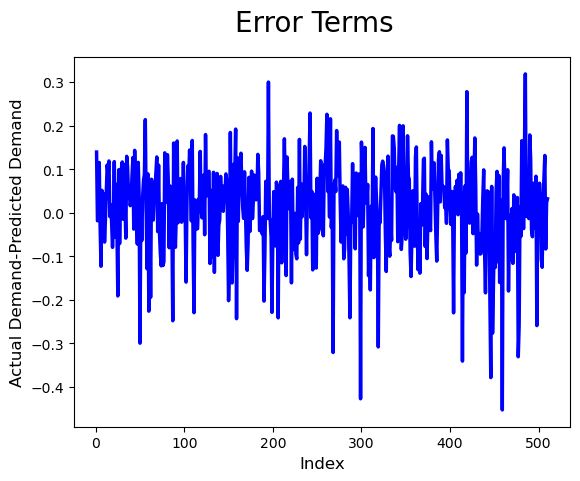

In [1271]:
# Error terms
c = [i for i in range(1,511,1)]
fig = plt.figure()
plt.plot(c,res, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=12)                      # X-label
plt.ylabel('Actual Demand-Predicted Demand', fontsize=12)                # Y-label

Text(0, 0.5, 'Views')

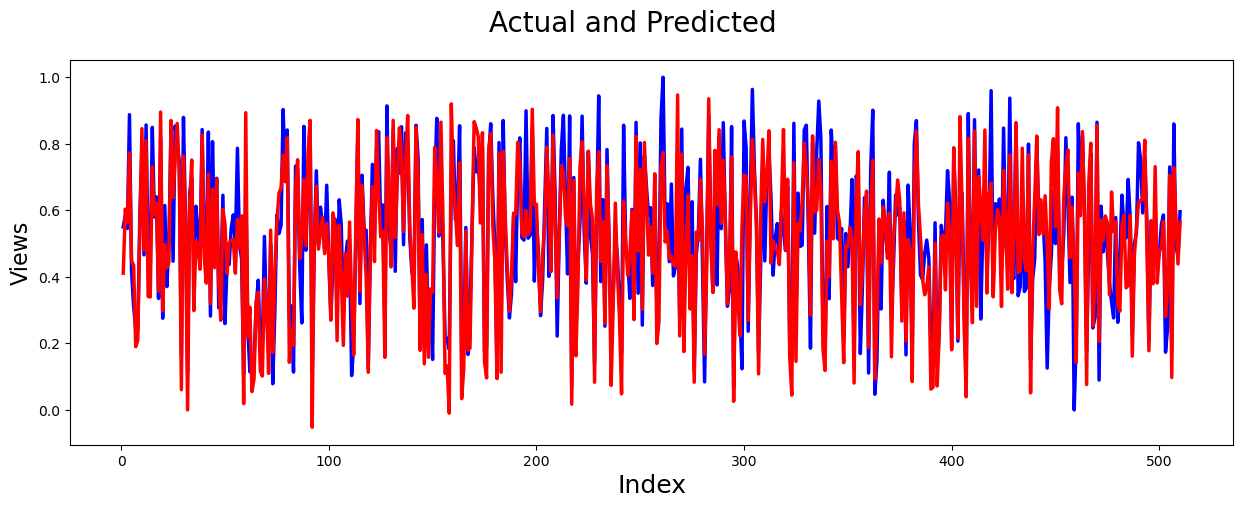

In [1272]:
#Actual vs Predicted
c = [i for i in range(1,511,1)]
fig = plt.figure(figsize=(15,5))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

# 4. Validation on test dataset

In [1273]:
# Transforming the test dataset using MinMaxScaler
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [1274]:
# Columns contained in final model
col = X_train_rfe.columns

#Selecting the required column from test dataset
X_test_rfe = bike_test[col]

# Selecting the demand from test dataset
y_test = bike_test['cnt']

In [1275]:
# Predicting demand of test dataset using the final model
y_test_pred = lm10.predict(X_test_rfe)

# Calculating R2-Score for test dataset
r2 = r2_score(y_true = y_test, y_pred=y_test_pred) 
r2

0.7933628466578242

# Conclusion

### 1. Relevant features to predict daily demands are:
    1. yr (Coeff: + 0.2515)  ## Year in which demand is being predicted
    2. temp (Coeff: + 0.7093) ## Temp on the day
    3. winter (Coeff: + 0.1359) ## Season is summer or not
    4. Sept (Coeff: + 0.0403)  ## Month is september or not
    5. holiday (Coeff: - 0.0810) ## weather day is a holiday or not
    6. July (Coeff: - 0.0928)  ## Month is July or not
    7. Cloudy (Coeff: - 0.0458) ## weathersit is 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' or not
    8. LRain (Coeff: - 0.2586)  ## weathersit is 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds' or not
    
### 2. Adjusted R2-Value on train dataset = 96.4%
### 3. Adjusted R2-Value on test dataset = 79.3%